In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from charset_normalizer import from_path

In [2]:
result = from_path("..\\..\\data\\collocations\\processed_collocations_set_from_the_supervisor.csv").best()

df = pd.read_csv("..\\..\\data\\collocations\\processed_collocations_set_from_the_supervisor.csv", encoding=result.encoding)

df

DocumentName  \
0                VoenObozrenN_0001.t   
1                VoenObozrenN_0001.t   
2                VoenObozrenN_0001.t   
3                VoenObozrenN_0001.t   
4                VoenObozrenN_0001.t   
...                              ...   
132876  Voen_Obozren_060524_011094.t   
132877  Voen_Obozren_060524_011094.t   
132878  Voen_Obozren_060524_011094.t   
132879  Voen_Obozren_060524_011094.t   
132880  Voen_Obozren_060524_011094.t   

                             OriginalCollocation  \
0                                  западный блок   
1                            беспилотный аппарат   
2                                     борт судно   
3                               высокий точность   
4       высокий уровень технический оснащенность   
...                                          ...   
132876                          флагманский дрон   
132877                флагманский дрон разведчик   
132878               фортификационный вооружение   
132879                       человеческий ошибка   
132880                                элемент ии   

                           NormalizedCollocation  Frequency  
0                                  западный блок          2  
1                            беспилотный аппарат          1  
2                                     борт судна          1  
3                               высокая точность          1  
4       высокий уровень технической оснащенности          1  
...                                          ...        ...  
132876                          флагманский дрон          1  
132877                флагманский дрон-разведчик          1  
132878               фортификационное вооружение          1  
132879                       человеческая ошибка          1  
132880                                элемент ИИ          1  

[132881 rows x 4 columns]

In [3]:
df['Frequency'] = df['Frequency'].astype(int)

In [4]:
doc_word_matrix = df.pivot_table(
    index='DocumentName',
    columns='NormalizedCollocation',
    values='Frequency',
    aggfunc='sum',
    fill_value=0
)

doc_word_matrix

NormalizedCollocation         "АД"  "Адмирал Спиридонов"  "Айрат"  "Арджун"  \
DocumentName                                                                  
VoenObozrenN_0001.t              0                     0        0         0   
VoenObozrenN_0002.t              0                     0        0         0   
VoenObozrenN_0003.t              0                     0        0         0   
VoenObozrenN_0004.t              0                     0        0         0   
VoenObozrenN_0005.t              0                     0        0         0   
...                            ...                   ...      ...       ...   
Voen_Obozren_060524_011090.t     0                     0        0         0   
Voen_Obozren_060524_011091.t     0                     0        0         0   
Voen_Obozren_060524_011092.t     0                     0        0         0   
Voen_Obozren_060524_011093.t     0                     0        0         0   
Voen_Obozren_060524_011094.t     0                     0        0         0   

NormalizedCollocation         "Ариабата"  "Арктический Клевер"  "Армавир-ВУ"  \
DocumentName                                                                   
VoenObozrenN_0001.t                    0                     0             0   
VoenObozrenN_0002.t                    0                     0             0   
VoenObozrenN_0003.t                    0                     0             0   
VoenObozrenN_0004.t                    0                     0             0   
VoenObozrenN_0005.t                    0                     0             0   
...                                  ...                   ...           ...   
Voen_Obozren_060524_011090.t           0                     0             0   
Voen_Obozren_060524_011091.t           0                     0             0   
Voen_Obozren_060524_011092.t           0                     0             0   
Voen_Obozren_060524_011093.t           0                     0             0   
Voen_Obozren_060524_011094.t           0                     0             0   

NormalizedCollocation         "Армамид" СВ-303 М  "Армата-лайт"  \
DocumentName                                                      
VoenObozrenN_0001.t                            0              0   
VoenObozrenN_0002.t                            0              0   
VoenObozrenN_0003.t                            0              0   
VoenObozrenN_0004.t                            0              0   
VoenObozrenN_0005.t                            0              0   
...                                          ...            ...   
Voen_Obozren_060524_011090.t                   0              0   
Voen_Obozren_060524_011091.t                   0              0   
Voen_Obozren_060524_011092.t                   0              0   
Voen_Obozren_060524_011093.t                   0              0   
Voen_Obozren_060524_011094.t                   0              0   

NormalizedCollocation         "Атомная станция-12"  ...  яркости горения  \
DocumentName                                        ...                    
VoenObozrenN_0001.t                              0  ...                0   
VoenObozrenN_0002.t                              0  ...                0   
VoenObozrenN_0003.t                              0  ...                0   
VoenObozrenN_0004.t                              0  ...                0   
VoenObozrenN_0005.t                              0  ...                0   
...                                            ...  ...              ...   
Voen_Obozren_060524_011090.t                     0  ...                0   
Voen_Obozren_060524_011091.t                     0  ...                0   
Voen_Obozren_060524_011092.t                     0  ...                0   
Voen_Obozren_060524_011093.t                     0  ...                0   
Voen_Obozren_060524_011094.t                     0  ...                0   

NormalizedCollocation         яростная критика  \
DocumentName        

In [5]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=doc_word_matrix.index, columns=doc_word_matrix.index)
similarity_df.to_csv("..\\..\\data\\collocations\\cosine_similarity_matrix.csv", index=True)
similarity_df

DocumentName                  VoenObozrenN_0001.t  VoenObozrenN_0002.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      1.000000             0.000000   
VoenObozrenN_0002.t                      0.000000             1.000000   
VoenObozrenN_0003.t                      0.000000             0.000000   
VoenObozrenN_0004.t                      0.021329             0.014692   
VoenObozrenN_0005.t                      0.004878             0.003312   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.000000             0.064503   
Voen_Obozren_060524_011091.t             0.000000             0.009359   
Voen_Obozren_060524_011092.t             0.000000             0.117587   
Voen_Obozren_060524_011093.t             0.001337             0.050094   
Voen_Obozren_060524_011094.t             0.000000             0.003692   

DocumentName                  VoenObozrenN_0003.t  VoenObozrenN_0004.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      0.000000             0.021329   
VoenObozrenN_0002.t                      0.000000             0.014692   
VoenObozrenN_0003.t                      1.000000             0.000000   
VoenObozrenN_0004.t                      0.000000             1.000000   
VoenObozrenN_0005.t                      0.000000             0.067238   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.004698             0.004458   
Voen_Obozren_060524_011091.t             0.000000             0.000000   
Voen_Obozren_060524_011092.t             0.000000             0.005488   
Voen_Obozren_060524_011093.t             0.000000             0.006686   
Voen_Obozren_060524_011094.t             0.042342             0.003841   

DocumentName                  VoenObozrenN_0005.t  VoenObozrenN_0006.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      0.004878             0.000000   
VoenObozrenN_0002.t                      0.003312             0.000000   
VoenObozrenN_0003.t                      0.000000             0.005400   
VoenObozrenN_0004.t                      0.067238             0.001367   
VoenObozrenN_0005.t                      1.000000             0.000000   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.000000             0.000000   
Voen_Obozren_060524_011091.t             0.000000             0.000000   
Voen_Obozren_060524_011092.t             0.000000             0.004742   
Voen_Obozren_060524_011093.t             0.002605             0.001714   
Voen_Obozren_060524_011094.t             0.000000             0.001639   

DocumentName                  VoenObozrenN_0007.t  VoenObozrenN_0008.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      0.000000             0.000000   
VoenObozrenN_0002.t                      0.003145             0.021976   
VoenObozrenN_0003.t                      0.000000             0.005277   
VoenObozrenN_0004.t                      0.000000             0.008237   
VoenObozrenN_0005.t                      0.000000             0.000000   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.000000             0.002427   
Voen_Obozren_060524_011091.t             0.000000             0.002797   
Voen_Obozren_060524_011092.t             0.000000             0.005019   
Voen_Obozren_060524_011093.t             0.000000             0.051688   
Voen_Obozren_060524_011094.t             0.000000             0.000000   

DocumentName                  VoenObozrenN_0009.t  VoenObozrenN_0010.t  ...  \
DocumentName                                                         

In [6]:
def save_clusters(labels, method_name):
    cluster_df = pd.DataFrame({"Document": doc_word_matrix.index, "Cluster": labels})
    cluster_df.to_csv(f"..\\..\\data\\collocations\\{method_name}_clusters.csv", index=False)

def save_cluster_centers(tfidf_matrix, labels, method_name):
    unique_clusters = np.unique(labels)
    cluster_centers = []

    for cluster in unique_clusters:
        if cluster == -1:
            continue
        cluster_indices = np.where(labels == cluster)[0]
        cluster_vectors = tfidf_matrix[cluster_indices].toarray()
        center_idx = np.argmin(cdist([cluster_vectors.mean(axis=0)], cluster_vectors)[0])
        central_file = doc_word_matrix.index[cluster_indices[center_idx]]
        cluster_centers.append((cluster, central_file))

    centers_df = pd.DataFrame(cluster_centers, columns=["Cluster", "Central_File"])
    centers_df.to_csv(f"..\\..\\data\\collocations\\{method_name}_cluster_centers.csv", index=False)

In [7]:
k = 200
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
save_clusters(kmeans_labels, "kmeans")
save_cluster_centers(tfidf_matrix, kmeans_labels, "kmeans")

In [8]:
eps = 0.6
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
dbscan_labels = dbscan.fit_predict(tfidf_matrix)
save_clusters(dbscan_labels, "dbscan")
save_cluster_centers(tfidf_matrix, dbscan_labels, "dbscan")

In [9]:
n_clusters_agglo = 100
agglo = AgglomerativeClustering(n_clusters=n_clusters_agglo, metric="cosine", linkage="average")
agglo_labels = agglo.fit_predict(tfidf_matrix.toarray())
save_clusters(agglo_labels, "agglomerative")
save_cluster_centers(tfidf_matrix, agglo_labels, "agglomerative")

In [10]:
def load_clusters(file_name):
    return pd.read_csv(file_name)

In [11]:
kmeans_clusters = load_clusters("..\\..\\data\\collocations\\kmeans_clusters.csv")
dbscan_clusters = load_clusters("..\\..\\data\\collocations\\dbscan_clusters.csv")
agglo_clusters = load_clusters("..\\..\\data\\collocations\\agglomerative_clusters.csv")

kmeans_cluster_centers = load_clusters("..\\..\\data\\collocations\\kmeans_cluster_centers.csv")
dbscan_cluster_centers = load_clusters("..\\..\\data\\collocations\\dbscan_cluster_centers.csv")
agglo_cluster_centers = load_clusters("..\\..\\data\\collocations\\agglomerative_cluster_centers.csv")

In [12]:
def visualize_clusters(labels, tfidf_matrix, method_name):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, metric='cosine')
    tsne_res = tsne.fit_transform(tfidf_matrix.toarray())

    unique_labels = np.unique(labels)
    cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=labels, cmap=cmap, s=10, alpha=0.9)
    plt.colorbar(scatter, label=f'{method_name} Cluster', ticks=range(len(unique_labels)))
    plt.title(f't-SNE визуализация кластеров {method_name}')
    plt.xlabel('t-SNE измерение 1')
    plt.ylabel('t-SNE измерение 2')
    plt.grid(True)
    plt.show()

    unique_clusters, counts = np.unique(labels, return_counts=True)
    print(f"{method_name} кластеры:", dict(zip(unique_clusters, counts)))

In [13]:
def generate_word_cloud(cluster_label, cluster_df, method_name):
    cluster_files = cluster_df[cluster_df['Cluster'] == cluster_label]['Document']
    print(f"Файлы в кластере {cluster_label} ({method_name}):")
    for f in cluster_files:
        print(f)

    for doc_name in cluster_files:
        doc_data = df[df['DocumentName'] == doc_name]
        word_freq = dict(zip(doc_data['NormalizedCollocation'], doc_data['Frequency']))
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Облако слов для {doc_name}')
        plt.show()

In [14]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_2876\3354410083.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


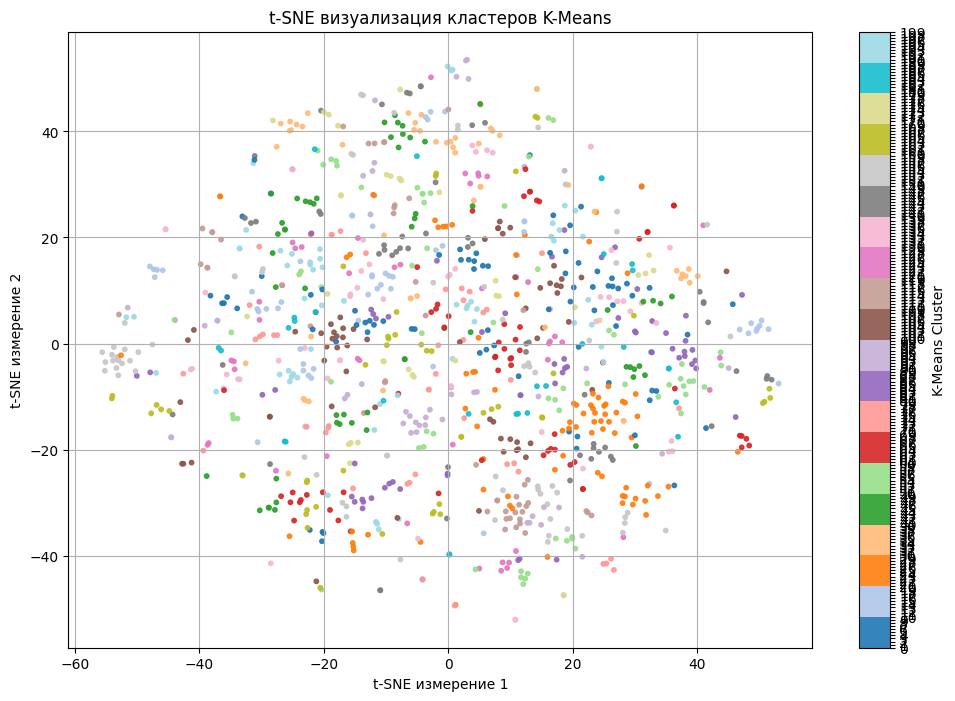

K-Means кластеры: {0: 5, 1: 5, 2: 3, 3: 8, 4: 9, 5: 10, 6: 12, 7: 17, 8: 3, 9: 5, 10: 5, 11: 4, 12: 4, 13: 7, 14: 2, 15: 8, 16: 4, 17: 5, 18: 10, 19: 4, 20: 2, 21: 7, 22: 7, 23: 2, 24: 3, 25: 14, 26: 3, 27: 3, 28: 6, 29: 37, 30: 4, 31: 5, 32: 2, 33: 4, 34: 4, 35: 6, 36: 9, 37: 7, 38: 2, 39: 9, 40: 7, 41: 7, 42: 7, 43: 4, 44: 10, 45: 5, 46: 7, 47: 7, 48: 2, 49: 1, 50: 8, 51: 2, 52: 6, 53: 5, 54: 7, 55: 7, 56: 8, 57: 8, 58: 3, 59: 12, 60: 5, 61: 6, 62: 4, 63: 13, 64: 2, 65: 12, 66: 8, 67: 5, 68: 3, 69: 4, 70: 4, 71: 4, 72: 5, 73: 4, 74: 6, 75: 3, 76: 7, 77: 4, 78: 4, 79: 4, 80: 15, 81: 10, 82: 2, 83: 3, 84: 2, 85: 6, 86: 5, 87: 8, 88: 5, 89: 6, 90: 6, 91: 6, 92: 5, 93: 3, 94: 2, 95: 4, 96: 4, 97: 11, 98: 4, 99: 2, 100: 11, 101: 2, 102: 3, 103: 4, 104: 20, 105: 2, 106: 2, 107: 6, 108: 9, 109: 3, 110: 4, 111: 17, 112: 5, 113: 7, 114: 3, 115: 2, 116: 2, 117: 1, 118: 6, 119: 4, 120: 5, 121: 1, 122: 7, 123: 5, 124: 2, 125: 10, 126: 5, 127: 2, 128: 5, 129: 3, 130: 6, 131: 3, 132: 8, 133: 9, 13

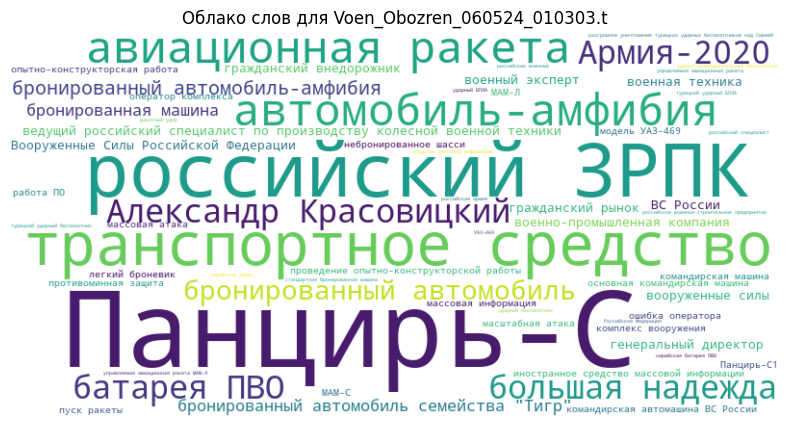

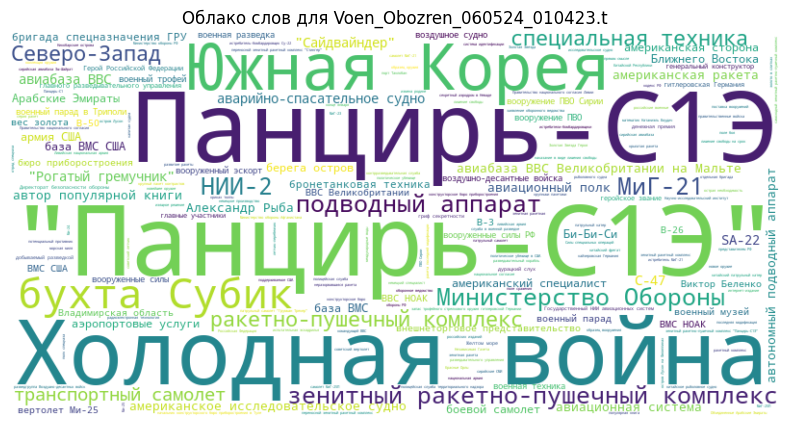

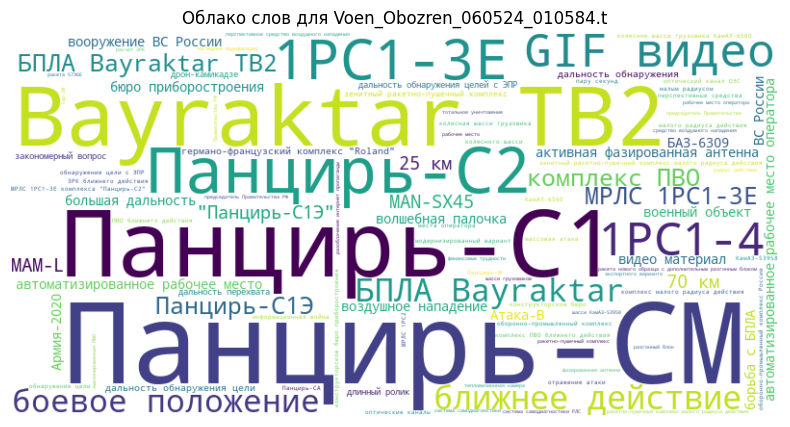

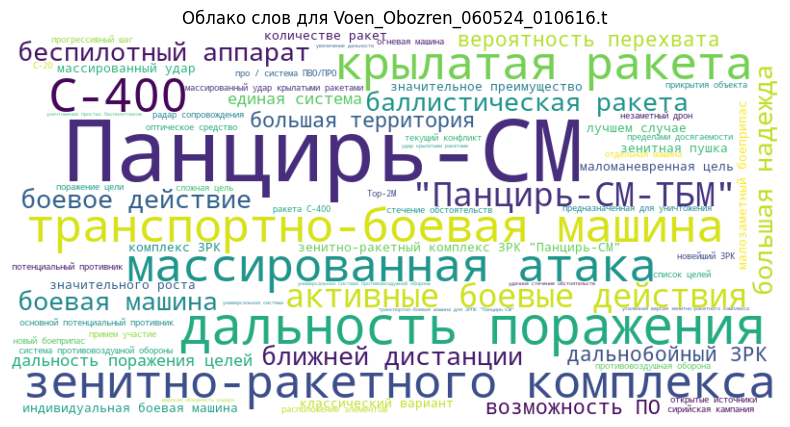

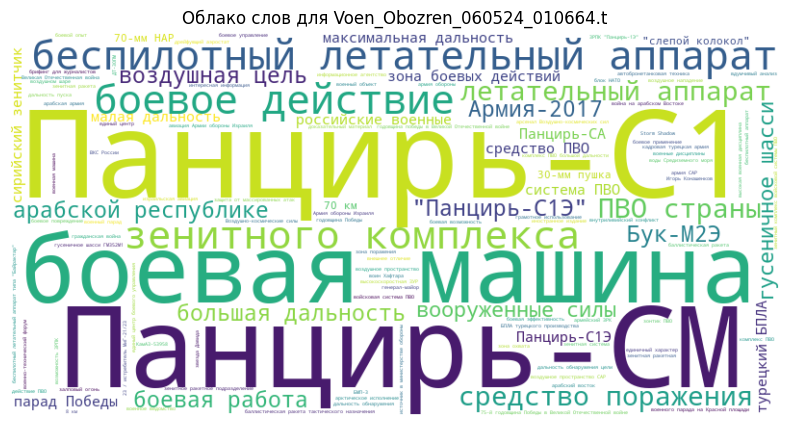

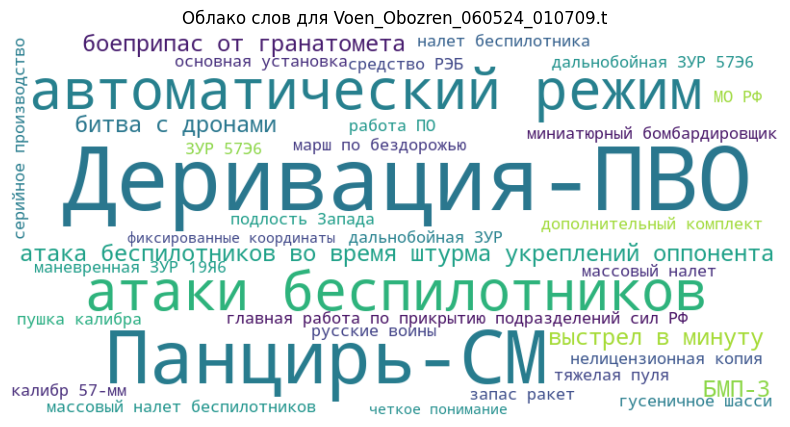

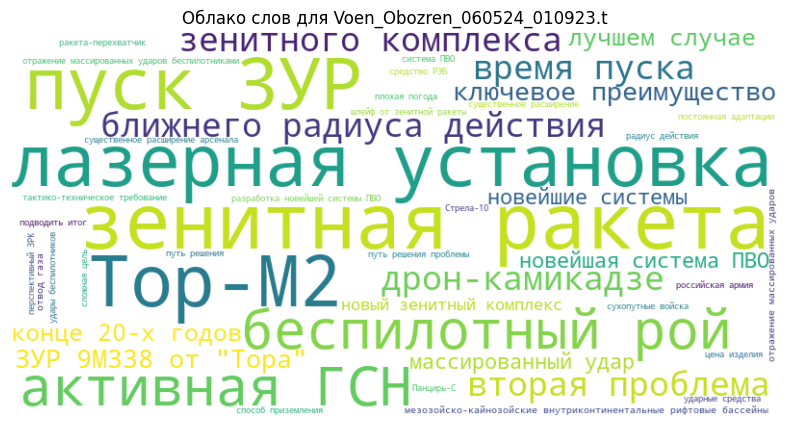

Document  Cluster
0              VoenObozrenN_0001.t      135
1              VoenObozrenN_0002.t      181
2              VoenObozrenN_0003.t       45
3              VoenObozrenN_0004.t       92
4              VoenObozrenN_0005.t       48
...                            ...      ...
1108  Voen_Obozren_060524_011090.t       80
1109  Voen_Obozren_060524_011091.t       80
1110  Voen_Obozren_060524_011092.t       80
1111  Voen_Obozren_060524_011093.t       63
1112  Voen_Obozren_060524_011094.t       41

[1113 rows x 2 columns]

In [15]:
visualize_clusters(kmeans_clusters['Cluster'].values, tfidf_matrix, "K-Means")
generate_word_cloud(21, kmeans_clusters, "K-Means")
kmeans_clusters

In [16]:
kmeans_cluster_centers[:25]

Cluster                  Central_File
0         0  Voen_Obozren_060524_010937.t
1         1  Voen_Obozren_060524_010044.t
2         2  Voen_Obozren_060524_010769.t
3         3  Voen_Obozren_060524_010565.t
4         4  Voen_Obozren_060524_010553.t
5         5  Voen_Obozren_060524_011056.t
6         6  Voen_Obozren_060524_010018.t
7         7  Voen_Obozren_060524_010186.t
8         8  Voen_Obozren_060524_010647.t
9         9  Voen_Obozren_060524_010343.t
10       10  Voen_Obozren_060524_010913.t
11       11           VoenObozrenN_0007.t
12       12  Voen_Obozren_060524_010062.t
13       13  Voen_Obozren_060524_010508.t
14       14  Voen_Obozren_060524_010008.t
15       15  Voen_Obozren_060524_010333.t
16       16  Voen_Obozren_060524_010306.t
17       17  Voen_Obozren_060524_010977.t
18       18  Voen_Obozren_060524_010460.t
19       19           VoenObozrenN_0009.t
20       20  Voen_Obozren_060524_010115.t
21       21  Voen_Obozren_060524_010584.t
22       22  Voen_Obozren_060524_010293.t
23       23           VoenObozrenN_0017.t
24       24  Voen_Obozren_060524_010948.t

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_2876\3354410083.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


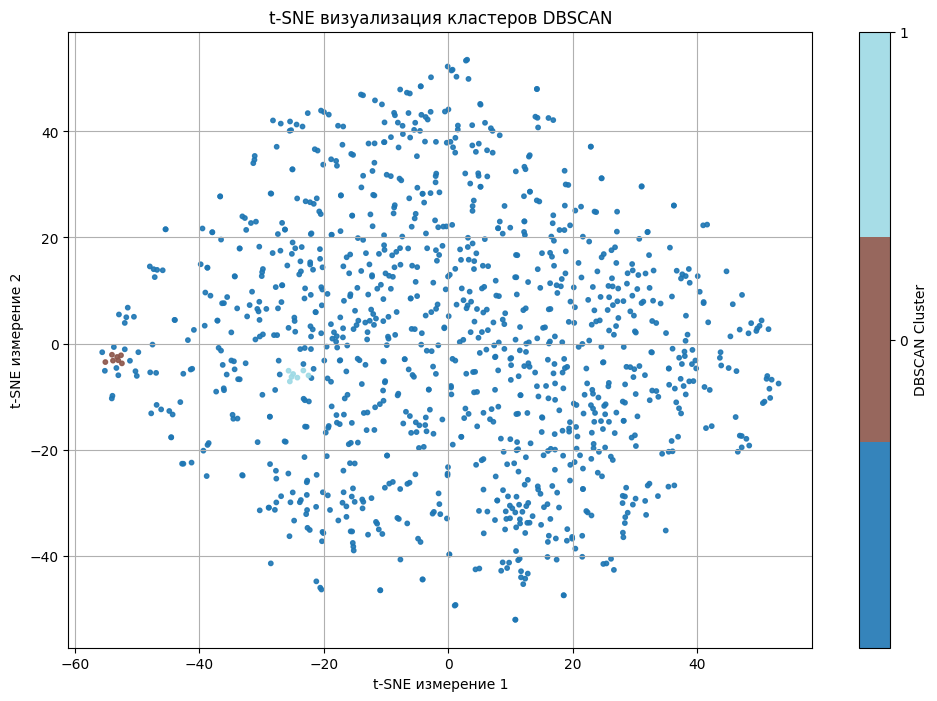

DBSCAN кластеры: {-1: 1099, 0: 7, 1: 7}
Файлы в кластере 8 (DBSCAN):


Document  Cluster
0              VoenObozrenN_0001.t       -1
1              VoenObozrenN_0002.t       -1
2              VoenObozrenN_0003.t       -1
3              VoenObozrenN_0004.t       -1
4              VoenObozrenN_0005.t       -1
...                            ...      ...
1108  Voen_Obozren_060524_011090.t       -1
1109  Voen_Obozren_060524_011091.t       -1
1110  Voen_Obozren_060524_011092.t       -1
1111  Voen_Obozren_060524_011093.t       -1
1112  Voen_Obozren_060524_011094.t       -1

[1113 rows x 2 columns]

In [17]:
visualize_clusters(dbscan_clusters['Cluster'].values, tfidf_matrix, "DBSCAN")
generate_word_cloud(8, dbscan_clusters, "DBSCAN")
dbscan_clusters

In [18]:
dbscan_cluster_centers

Cluster                  Central_File
0        0  Voen_Obozren_060524_010453.t
1        1  Voen_Obozren_060524_010517.t

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_2876\3354410083.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


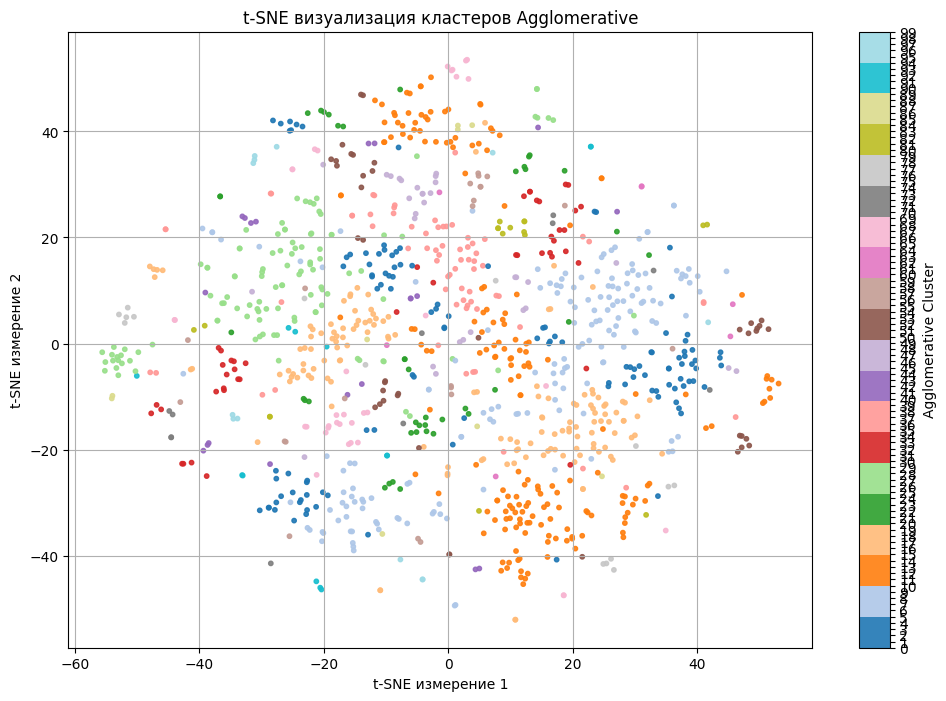

Agglomerative кластеры: {0: 27, 1: 17, 2: 23, 3: 42, 4: 9, 5: 94, 6: 3, 7: 5, 8: 11, 9: 52, 10: 123, 11: 10, 12: 2, 13: 48, 14: 2, 15: 6, 16: 4, 17: 9, 18: 70, 19: 56, 20: 7, 21: 16, 22: 6, 23: 7, 24: 5, 25: 81, 26: 4, 27: 2, 28: 7, 29: 17, 30: 3, 31: 4, 32: 14, 33: 5, 34: 19, 35: 7, 36: 4, 37: 4, 38: 50, 39: 5, 40: 4, 41: 6, 42: 2, 43: 5, 44: 3, 45: 4, 46: 16, 47: 2, 48: 2, 49: 7, 50: 3, 51: 9, 52: 13, 53: 14, 54: 2, 55: 4, 56: 3, 57: 3, 58: 11, 59: 1, 60: 1, 61: 1, 62: 2, 63: 1, 64: 2, 65: 3, 66: 2, 67: 16, 68: 10, 69: 4, 70: 1, 71: 2, 72: 2, 73: 4, 74: 2, 75: 1, 76: 1, 77: 5, 78: 5, 79: 3, 80: 2, 81: 2, 82: 3, 83: 1, 84: 9, 85: 1, 86: 2, 87: 2, 88: 3, 89: 1, 90: 4, 91: 3, 92: 2, 93: 2, 94: 2, 95: 1, 96: 1, 97: 3, 98: 1, 99: 6}
Файлы в кластере 11 (Agglomerative):
Voen_Obozren_060524_010104.t
Voen_Obozren_060524_010265.t
Voen_Obozren_060524_010341.t
Voen_Obozren_060524_010380.t
Voen_Obozren_060524_010390.t
Voen_Obozren_060524_010446.t
Voen_Obozren_060524_010482.t
Voen_Obozren_060524_

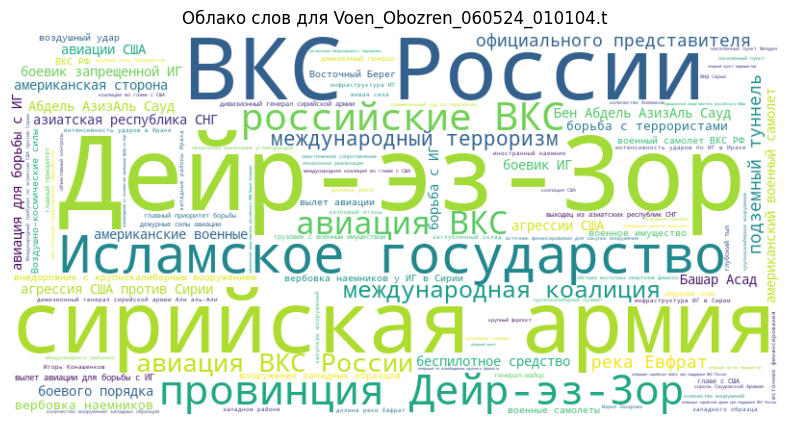

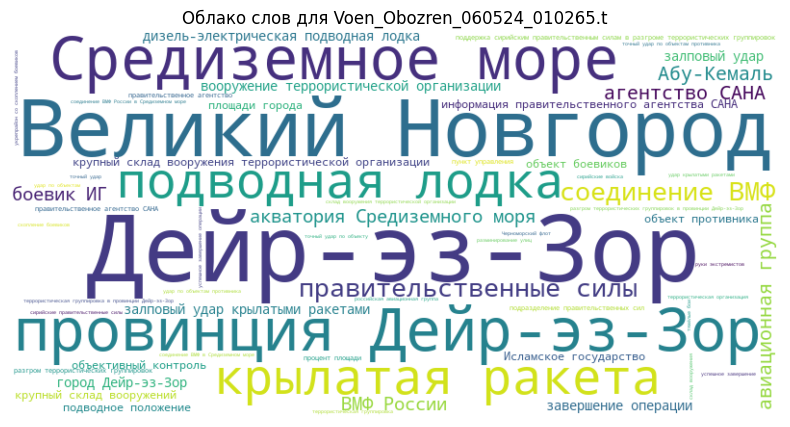

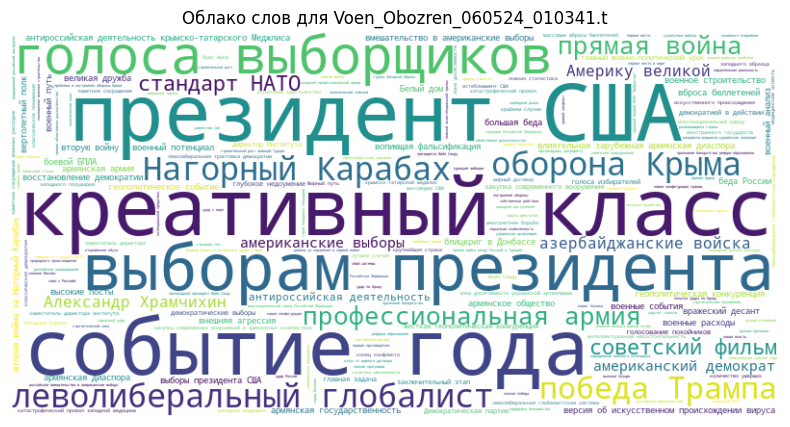

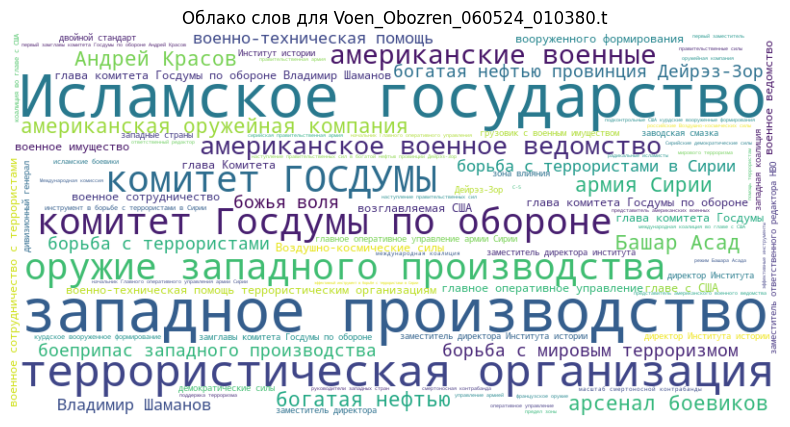

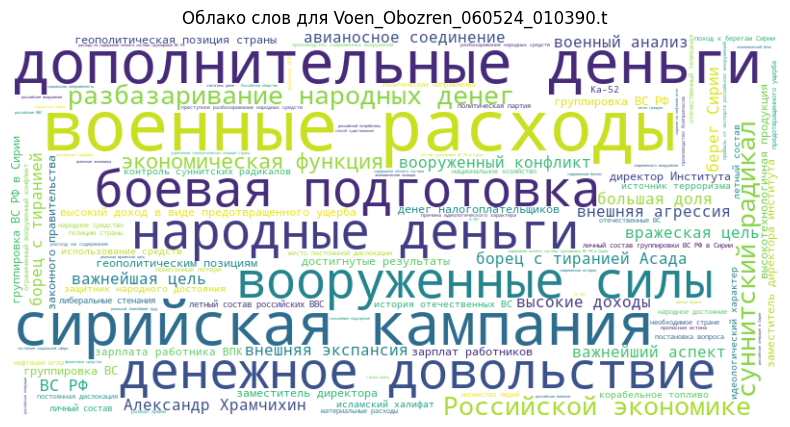

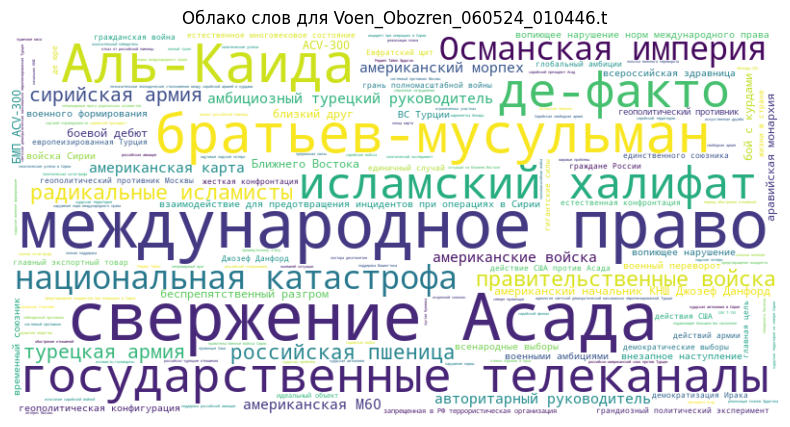

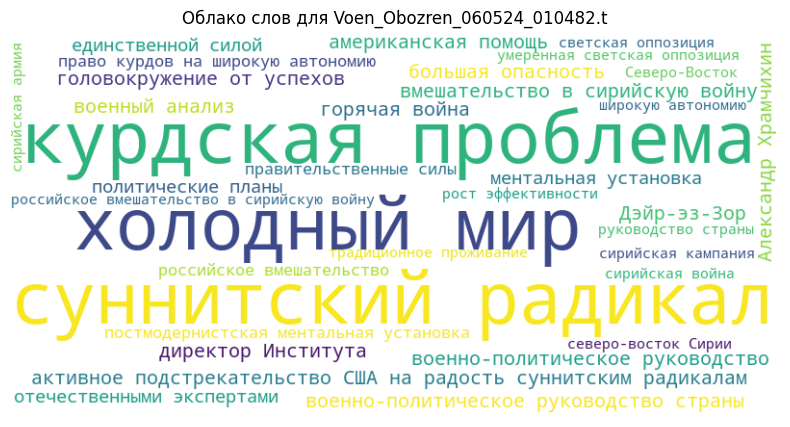

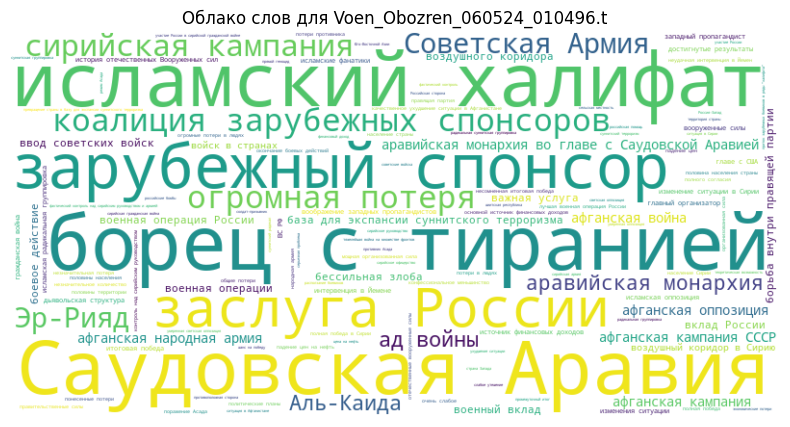

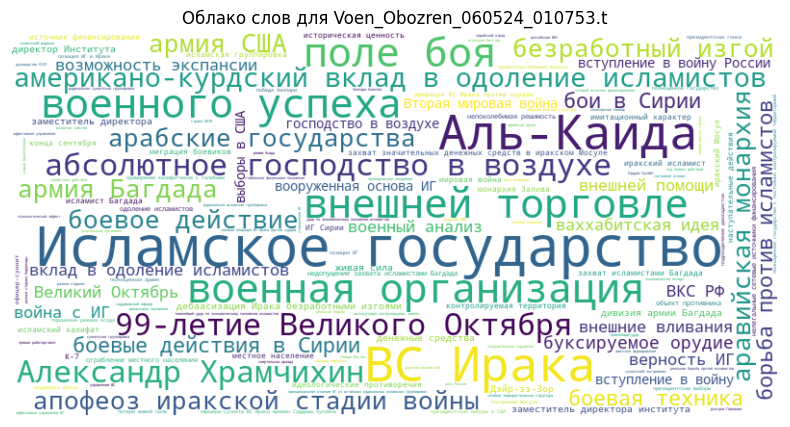

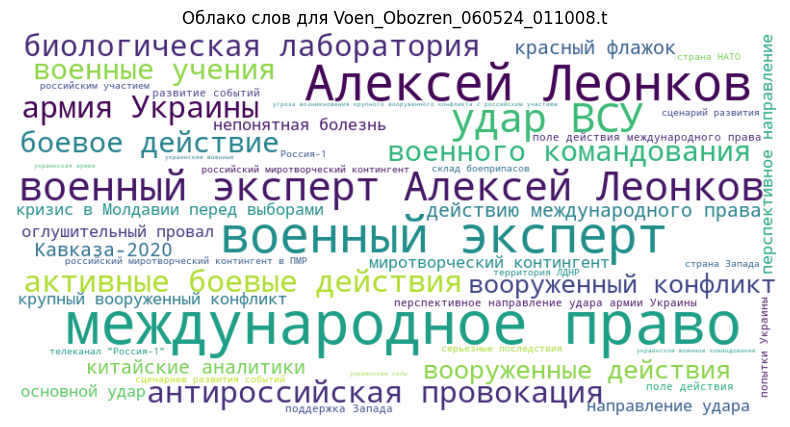

Document  Cluster
0              VoenObozrenN_0001.t       37
1              VoenObozrenN_0002.t        3
2              VoenObozrenN_0003.t       25
3              VoenObozrenN_0004.t       25
4              VoenObozrenN_0005.t       23
...                            ...      ...
1108  Voen_Obozren_060524_011090.t        3
1109  Voen_Obozren_060524_011091.t       59
1110  Voen_Obozren_060524_011092.t        3
1111  Voen_Obozren_060524_011093.t       10
1112  Voen_Obozren_060524_011094.t       25

[1113 rows x 2 columns]

In [19]:
visualize_clusters(agglo_clusters['Cluster'].values, tfidf_matrix, "Agglomerative")
generate_word_cloud(11, agglo_clusters, "Agglomerative")
agglo_clusters

In [20]:
agglo_cluster_centers

Cluster                  Central_File
0         0  Voen_Obozren_060524_010780.t
1         1  Voen_Obozren_060524_010972.t
2         2  Voen_Obozren_060524_010825.t
3         3  Voen_Obozren_060524_010620.t
4         4  Voen_Obozren_060524_011053.t
..      ...                           ...
95       95  Voen_Obozren_060524_010310.t
96       96  Voen_Obozren_060524_010904.t
97       97  Voen_Obozren_060524_010987.t
98       98  Voen_Obozren_060524_010960.t
99       99  Voen_Obozren_060524_010249.t

[100 rows x 2 columns]

In [21]:
output_path = "..\\..\\data\\collocations\\dataprocessed_dataset.csv"
df.to_csv(output_path, index=False, encoding='windows-1251')
print(f"Данные успешно сохранены в {output_path}")

Данные успешно сохранены в ..\..\data\collocations\dataprocessed_dataset.csv
